
<table>
<table border = 5  align = center bgcolor="white" cellspacing="10px">

<tr>
<td><a href="https://drive.google.com/file/d/14zSOmdu6bdqw-uaDRTpgRnSfsDi90DbU/view?usp=sharing"> <img alt="Colaboratory logo" width="150px"  src="https://miro.medium.com/max/986/1*S2AyJcdw8EPcn7gwDVSBCA.png" align="left" hspace="10px" vspace="0px" /> </a> </td>
   
    
 
<td></td>
    
<td><a href="https://mybinder.org/v2/git/https%3A%2F%2Fgitmilab.redclara.net%2FhalleyUIS%2Fmoncora.git/4d1344cb6f0df9a23bce6fe9d70812719aeb0fe5?urlpath=lab%2Ftree%2FBook%2FJupyter_Notebooks%2FDatosII.ipynb"><img src="https://mybinder.org/static/images/logo_social.png" alt="Alternative text" width="150px"  /></a>
</td>

</tr>

</table>
    
<br>
    
---

# <strong>Los datos hablan I</strong>

En este Notebook, realizaremos una **visualización gráfica** de los datos de temperatura obtenidos de las [estaciones](https://class.redclara.net/halley/moncora/intro.html) meteorológicas de la red RACIMO-Móncora para un periodo de tiempo determinado. Para esto, utilizaremos pricipalmente las librerias de Python [MakeSens](https://docs.makesens.co/help/api-sdk/makesensapi-en-python) para acceder a los datos, [Pandas](https://pandas.pydata.org/) para manejarlos y [Matplotlib](https://matplotlib.org/) para visualizarlos.



# **Aspectos básicos**

## **1. Obtención de datos**

Mediante el uso de la API de MakeSens (libreria de python) descargamos los datos de una de las [estaciones](https://class.redclara.net/halley/moncora/intro.html) de la red de RACIMO-Móncora. 

Para esto definimos:
* Rango de tiempo con fechas en el formato: `%Y-%m-%d %H:%M:%S` Por ejemplo: `2023-08-01 00:00:00`
* Identificación de la estación `mE1_00004`
* Frecuencia de muestreo: `m`, `h`, `d`, `w`.

Frecuencias de muestreo:
||Significado|
|--|--|
|`m`|minutos|
|`h`|horas|
|`d`|días|
|`w`|semanas|

Estaciones:
|`ID`|Colegio|
|--|--|
|`mE1_00004`|Instituto Técnico Damaso Zapata|
|`mE1_00005`|Colegio Santander|
|`mE1_00006`|Institución Educativa Nuestra Señora del Pilar|
|`mE1_00007`|Escuela Normal Superior|
|`mE1_00008`|Fundación Colegio UIS|
|`E2_00023`|Grupo Halley-UIS|


Luego, utilizamos la función download_data:
```
from MakeSens import MakeSens
data = MakeSens.download_data('mE1_00007', '2023-04-30 00:00:00', '2023-05-07 23:00:00', 'm')
```

Para más información sobre la API de MakeSens, puedes consultar la [documentación](https://docs.makesens.co/help/api-sdk/makesensapi-en-python).

In [ ]:
!pip install APIMakeSens

In [2]:
from MakeSens import MakeSens
import numpy as np
import pandas as pd

**Libreria MakeSens**

In [3]:
estacion = 'mE1_00008'           # Nombre estacion miniEva
start = '2023-08-06 00:00:00'    # Fecha de inicio: año-mes-día hora:minuto:segundo
end   = '2023-08-10 00:00:00'    # Fecha de fin:    año-mes-día hora:minuto:segundo
frec  = 'm'                      # m: minutos, h: horas, d: días

data = MakeSens.download_data(estacion, start, end,frec) # Descargar los datos

Veámos los datos:

In [31]:
data

,humedad2,iluminancia,temperatura2,humedad,temperatura,presion,pm_n_2_5_2,pm25_1,pm25_2,pm1_1_AE,...,pm_n_0_3_1,pm_n_5_0_1,pm_n_5_0_2,pm10_2,pm10_1,pm25_2_AE,pm_n_1_0_1,pm_n_1_0_2,longitud,latitud
2023-08-06 00:00:00,41.297016,272.0,37.328907,36.225246,38.408794,656.677063,9.0,29.0,24.0,17.0,...,3396.0,2.0,0.0,24.0,31.0,24.0,172.0,182.0,None,None
2023-08-06 00:02:00,41.402306,273.0,37.302204,36.032043,38.408794,656.760193,7.0,18.0,17.0,14.0,...,2934.0,0.0,2.0,18.0,19.0,17.0,102.0,90.0,None,None
2023-08-06 00:04:00,41.177998,270.0,37.246128,35.968632,38.336823,659.901794,9.0,17.0,17.0,14.0,...,2460.0,0.0,0.0,17.0,17.0,17.0,104.0,106.0,None,None
2023-08-06 00:06:00,41.191730,274.0,37.371632,36.049122,38.444778,655.134033,10.0,17.0,19.0,13.0,...,2598.0,2.0,0.0,19.0,18.0,19.0,106.0,100.0,None,None
2023-08-06 00:08:00,41.326008,274.0,37.358280,36.049473,38.419075,656.304504,9.0,18.0,17.0,15.0,...,2838.0,2.0,1.0,18.0,19.0,17.0,102.0,115.0,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-08-09 23:51:00,38.023956,272.0,38.461128,32.384815,39.920193,589.970459,3.0,12.0,8.0,8.0,...,1776.0,0.0,0.0,8.0,12.0,8.0,80.0,49.0,None,None
2023-08-09 23:53:00,37.801174,270.0,38.616005,31.853399,40.012726,585.662964,9.0,10.0,9.0,8.0,...,1512.0,0.0,0.0,9.0,10.0,9.0,54.0,46.0,None,None
2023-08-09 23:55:00,37.782864,276.0,38.533226,31.982691,40.017868,585.432190,3.0,10.0,10.0,7.0,...,1668.0,2.0,0.0,10.0,11.0,10.0,68.0,66.0,None,None
2023-08-09 23:57:00,37.787441,270.0,38.477150,31.882933,40.007587,585.929871,3.0,10.0,10.0,8.0,...,1656.0,0.0,0.0,10.0,10.0,10.0,62.0,65.0,None,None


**Nota:** En total tenemos 32 columnas, en este enlace puedes conocer acerca de cada una de ellas: [Campo de datos](https://docs.makesens.co/productos/minieva/acceso-a-los-datos/campos-de-datos)

In [ ]:
MakeSens.download_data('mE1_00008',          # Estacion
                    '2023-07-10 23:00:00',   # Inicio
                    '2023-08-10 23:00:00',   # Fin
                    'h')                     # Muestreo

In [ ]:
cols = ["temperatura", "temperatura2"]
data[cols]

In [32]:
temp = data[["temperatura", "temperatura2"]].copy()
temp

,temperatura,temperatura2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-09 23:51:00,39.920193,38.461128
2023-08-09 23:53:00,40.012726,38.616005
2023-08-09 23:55:00,40.017868,38.533226
2023-08-09 23:57:00,40.007587,38.477150


## **2. Manejo de datos**



Una vez que descargamos el DataFrame con todos los datos de la estación, seleccionaremos los datos de temperatura en las columnas *"temperatura"* y *"temperatura2"* y los almacenaremos en un nuevo DataFrame: ``` temp ```

> ¿Por qué tenemos dos columnas de temperatura?

 Luego, renombraremos las columnas para que tengan nombres más cortos y entendibles. Finalmente, convertiremos el índice de los datos a formato de fecha y hora con la función ```to_datetime()``` para manejarlos facilmente y utilizarlos en la visualización.

**Copiamos dataset**

* Debemos copiar el dataset para evitar errores de sincronización de datos con el dataset viejo.
* Renombramos las columnas por comodidad

In [33]:
temp = data[["temperatura", "temperatura2"]].copy()
temp.columns = ["T1", "T2"]                           # Renombramos las columnas 
temp

,T1,T2
2023-08-06 00:00:00,38.408794,37.328907
2023-08-06 00:02:00,38.408794,37.302204
2023-08-06 00:04:00,38.336823,37.246128
2023-08-06 00:06:00,38.444778,37.371632
2023-08-06 00:08:00,38.419075,37.358280
...,...,...
2023-08-09 23:51:00,39.920193,38.461128
2023-08-09 23:53:00,40.012726,38.616005
2023-08-09 23:55:00,40.017868,38.533226
2023-08-09 23:57:00,40.007587,38.477150


**Convertimos índice en formato de fecha**

* Esto nos permite hacer cosas interesantes

In [26]:
temp.index

Index(['2023-08-06 00:00:00', '2023-08-06 00:02:00', '2023-08-06 00:04:00',
       '2023-08-06 00:06:00', '2023-08-06 00:08:00', '2023-08-06 00:10:00',
       '2023-08-06 00:12:00', '2023-08-06 00:14:00', '2023-08-06 00:16:00',
       '2023-08-06 00:18:00',
       ...
       '2023-08-09 23:41:00', '2023-08-09 23:43:00', '2023-08-09 23:45:00',
       '2023-08-09 23:47:00', '2023-08-09 23:49:00', '2023-08-09 23:51:00',
       '2023-08-09 23:53:00', '2023-08-09 23:55:00', '2023-08-09 23:57:00',
       '2023-08-09 23:59:00'],
      dtype='object', length=2621)

In [34]:
temp.index = pd.to_datetime(temp.index)   # Convertimos el indice a formato datetime

In [35]:
# Datos de un mes especifico
temp.loc['2023-08-07 10']

,T1,T2
2023-08-07 10:01:00,27.156363,27.915998
2023-08-07 10:03:00,27.007298,27.675669
2023-08-07 10:05:00,26.904495,27.646296
2023-08-07 10:07:00,26.652630,27.336538
2023-08-07 10:09:00,26.560108,27.211033
2023-08-07 10:11:00,26.544689,27.280460
2023-08-07 10:13:00,26.292824,27.010757
2023-08-07 10:15:00,26.128342,26.786449
2023-08-07 10:17:00,25.984421,26.842527
2023-08-07 10:19:00,26.184883,27.010757


In [36]:
# Datos de un día especifico
temp.loc['2023-07-11']

KeyError: '2023-07-11'

In [20]:
# Datos de una hora especifica de un día
temp.loc['2023-07-07 10']

KeyError: '2023-07-07 10'

# **Análisis de datos**

## **1. Promedio por sensores y por día**
**¿Los datos de temperatura miden lo mismo?**

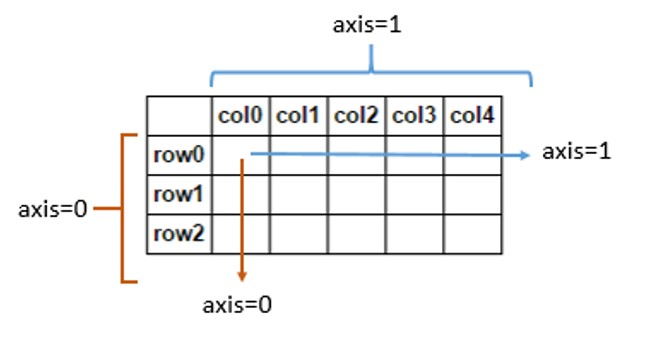

**Promedio**

In [37]:
temp['mean'] = (temp['T1'] + temp['T2'])/2
temp

,T1,T2,mean
2023-08-06 00:00:00,38.408794,37.328907,37.868851
2023-08-06 00:02:00,38.408794,37.302204,37.855499
2023-08-06 00:04:00,38.336823,37.246128,37.791476
2023-08-06 00:06:00,38.444778,37.371632,37.908205
2023-08-06 00:08:00,38.419075,37.358280,37.888678
...,...,...,...
2023-08-09 23:51:00,39.920193,38.461128,39.190660
2023-08-09 23:53:00,40.012726,38.616005,39.314366
2023-08-09 23:55:00,40.017868,38.533226,39.275547
2023-08-09 23:57:00,40.007587,38.477150,39.242368


In [38]:
import matplotlib.pyplot as plt

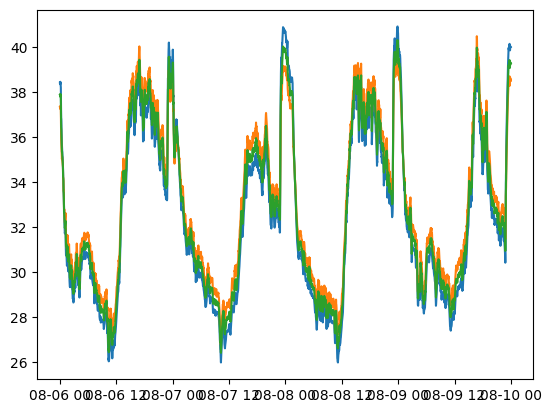

In [39]:
plt.plot(temp['T1'])
plt.plot(temp['T2'])
plt.plot(temp['mean'])

**Promedio diario**

La funcion `.resample('d')` permite agrupar los datos por día `'d'`, mes `'m'` u hora `'h'` entre otros. Veamos como funciona.

In [61]:
temp_mean = temp['mean']

In [62]:
temp_mean_h = temp_mean.resample('h').mean()

In [63]:
temp_mean_d = temp_mean.resample('d').mean()

Para más información sobre la función ```.resample()``` consultar la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.resample.html). 

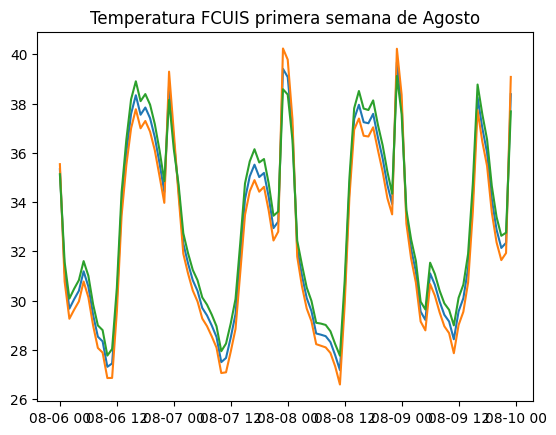

In [ ]:
plt.plot(temp_mean_h.index, temp_mean_h)
plt.plot(temp.index, temp['T1'])
plt.plot(temp.index, temp['T2'])

plt.title('Temperatura FCUIS primera semana de Agosto')
plt.show()

Podemos mejorar la grafica en almenos los siguientes aspectos:
* Color de línea
* Tipo de línea
* Marcas de puntos

### **Visualización de datos Introducción básica**

In [ ]:
import matplotlib.pyplot as plt

La estructura básica en `matplotlib.pyplot` es `plt.figure()`. Las `figures` son como los lienzos en blancos en donde vamos a hacer nuestras pinturas de visualización de datos. Son el background o fondo donde vamos a dibujar los trazos.

In [ ]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

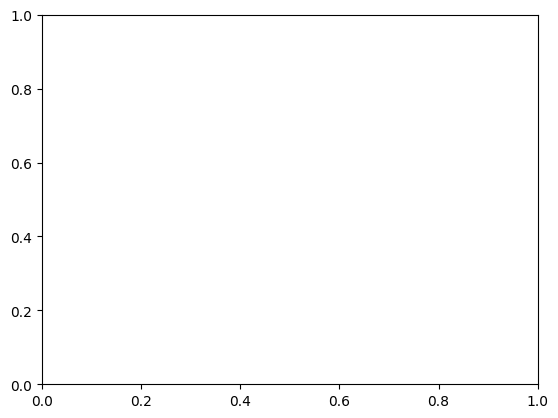

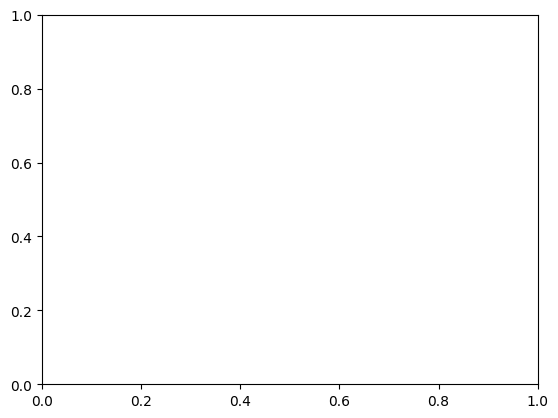

In [ ]:
fig = plt.figure()
ax = fig.gca()       # gca() significa: Get the current axes -> Obten los ejes actuales
fig

En un lienzo de python podemos graficar puntos, líneas y sombreados.

In [ ]:
# Datos
import numpy as np
x = np.linspace(0,10,20)
y = np.random.random(20)

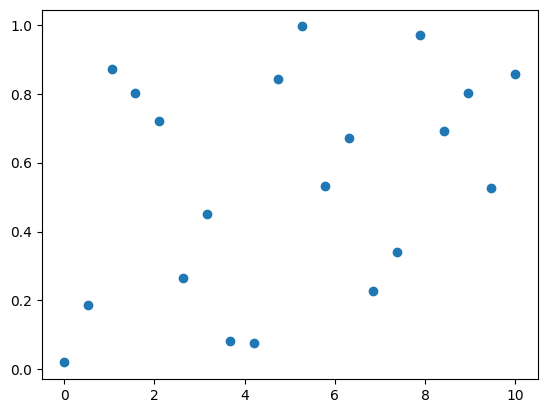

In [ ]:
# Figura
fig = plt.figure()
plt.plot(x,y,'o')

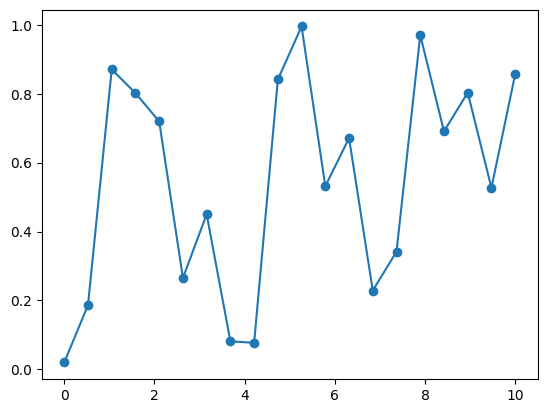

In [ ]:
# Figura
fig = plt.figure()
plt.plot(x,y,'o-')

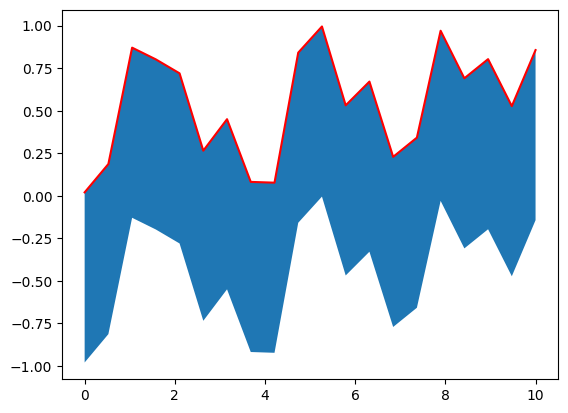

In [ ]:
# Figura
fig = plt.figure()
plt.plot(x,y,'-',color='red')
plt.fill_between(x,y,y-1)

**Atributos de `plt.plot`**

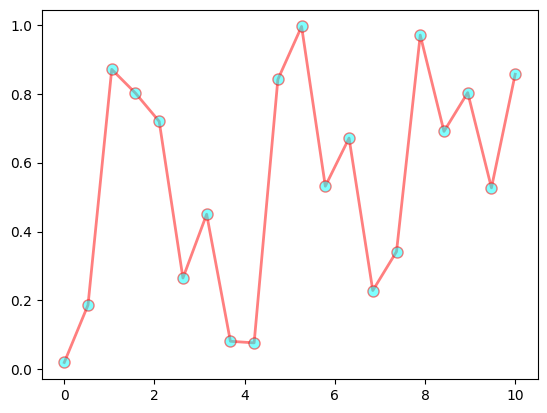

In [ ]:
fig = plt.figure()
plt.plot(x,                        # Datos eje x
        y,                         # Datos eje y
       '-or',                      # Formato corto: 'linea-marcadores-color'
        markerfacecolor = 'cyan',  # Color marcador                             # mfc
        label = 'Datos',           # Etiquetas
        alpha = 0.5,               # Transparencia
        markersize = 8,           # Marker size -> tamaño marcadores           # ms
        linewidth  = 2)          # Linewidth -> grosor de línea               # lw

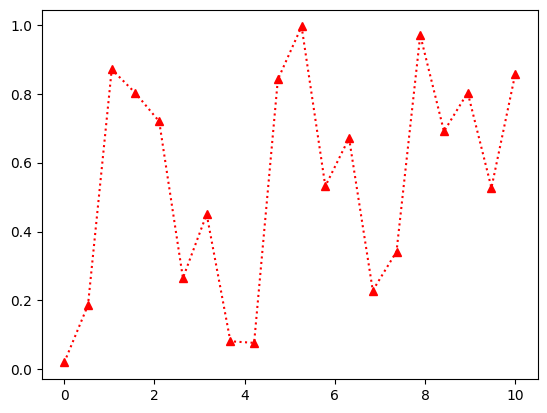

In [ ]:
plt.plot(x,y,color='red',linestyle=':',marker='^')

Estilos de línea (ver más [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.lines.Line2D.html#matplotlib.lines.Line2D.set_linestyle))
|Estilo de línea|Significado|
|--|--|
|`-`|sólido|
|`--`|segmentado|
|`-.`|línea segmento-punto|
|`:`|línea punteada|
|` `|no línea|

Estilos de marcadores (ver más [aquí](https://matplotlib.org/stable/api/_as_gen/matplotlib.markers.MarkerStyle.html#matplotlib.markers.MarkerStyle))
|Marcador|Significado|
|--|--|
|`.`|punto|
|`,`|pixel|
|`o`|círculo|
|`v`|triángulo abajo|
|`^`|triángulo arriba|
|`<`|triángulo izquierda|
|`>`|triángulo derecha|
|`*`|estrella|
|`h`|hexágono|
|`p`|pentágono|

Estilos de colores (ver más [aquí](https://matplotlib.org/stable/gallery/color/named_colors.html))
|Denominacion|Color [inglés]|Color  [español]|
|--|--|--|
|`b`|blue|azúl|
|`r`|red|rojo|
|`g`|green|verde|
|`c`|cyan|celeste|
|`m`|magenta|magenta|
|`y`|yellow|amarillo|
|`k`|black|negro|
|`w`|white|blanco|
|`p`|pink|rosado|
|`violet`|violet|violeta|

En `matplotlib` también se puede usar el nombre del color (`green`) o su formato hexadécimal (`#008000`). Por ejemplo, valla a este [enlace](https://htmlcolorcodes.com/) para probar con diferentes colores en formato hexadécimal.

Aquí hay una documentación completa de [`plt.plot`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html)

**Sub-gráficas**

Son otro aspecto importante que permite graficar varias imágenes una al lado de otra.

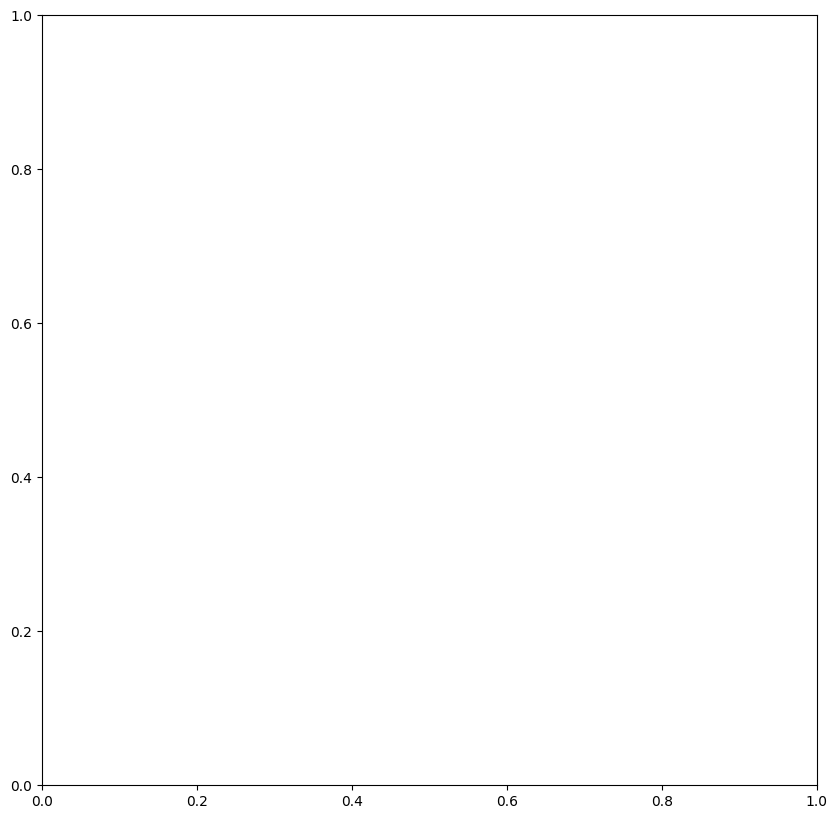

In [ ]:
fig  = plt.figure(figsize=(10,10))
ax = fig.gca()

<Axes: >

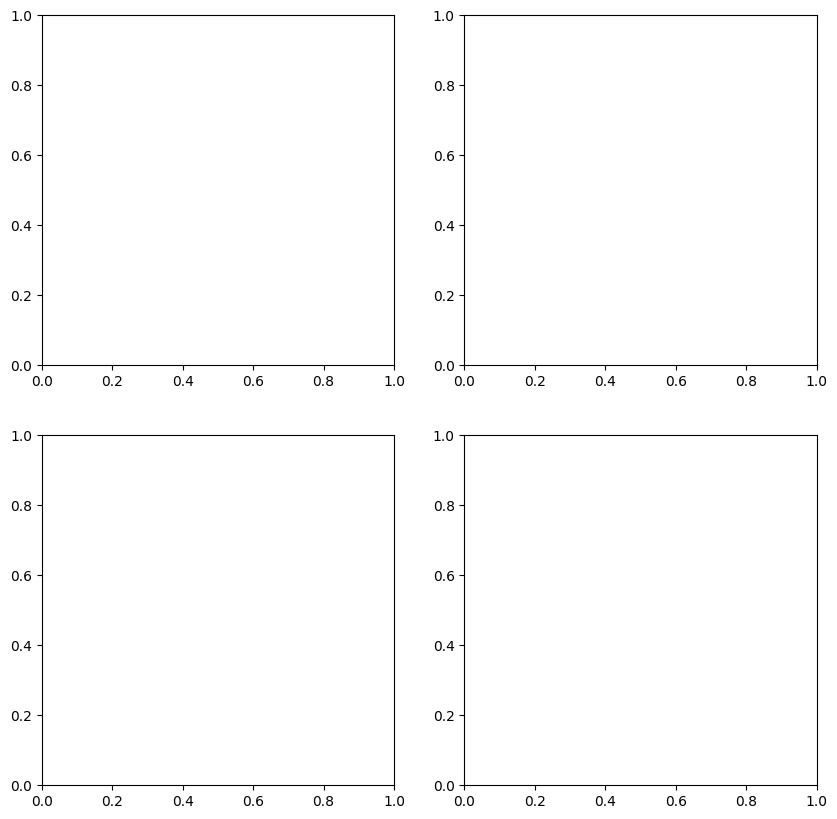

In [ ]:
fig  = plt.figure(figsize=(10,10))
plt.subplot(221)
#plt.plot(x,y)

plt.subplot(222)
#plt.plot(x,y,'--*r')

plt.subplot(223)
#plt.plot(x,y,'.g',ms=10)

plt.subplot(224)
#plt.plot(x,y**2,'-.',ms=10)

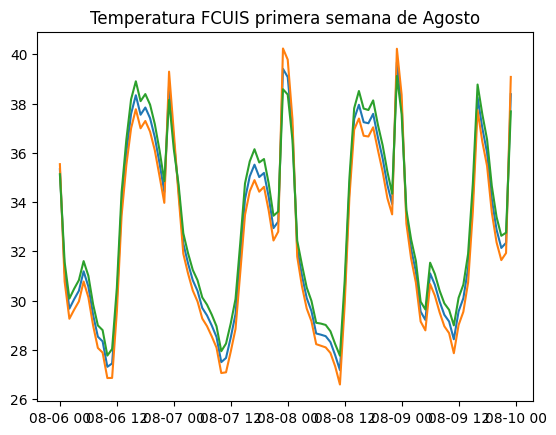

In [ ]:
plt.plot(temp_mean_h.index, temp_mean_h)
plt.plot(temp.index, temp['T1'])
plt.plot(temp.index, temp['T2'])

plt.title('Temperatura FCUIS primera semana de Agosto')
plt.show()

### **Generación de gráficos**

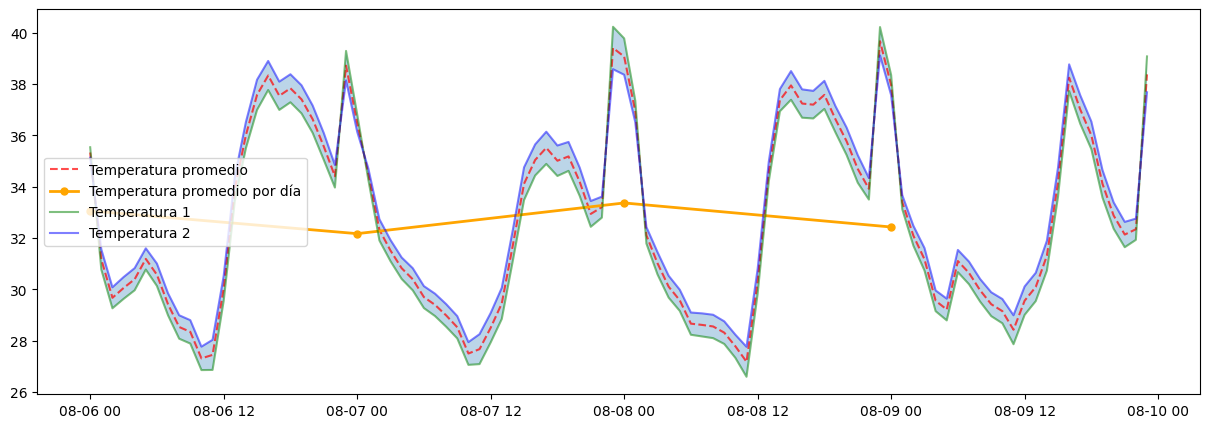

In [ ]:
#Generamos la figura
fig = plt.figure(figsize=(15, 5))
ax = fig.gca()

#Graficamos los datos
plt.plot(temp_mean_h, '--r', label="Temperatura promedio", ms=4, alpha=0.7)
plt.plot(temp_mean_d, '-o', label="Temperatura promedio por día", ms=5, lw=2, color="orange")
plt.plot(temp['T1'], "-g", label="Temperatura 1", alpha=0.5)
plt.plot(temp['T2'], "-b", label="Temperatura 2", alpha=0.5)
plt.fill_between(temp_mean.index, y1 = temp.T1, y2 = temp.T2, alpha=0.3)

plt.legend()
plt.show()

Mejoremos la grafica:

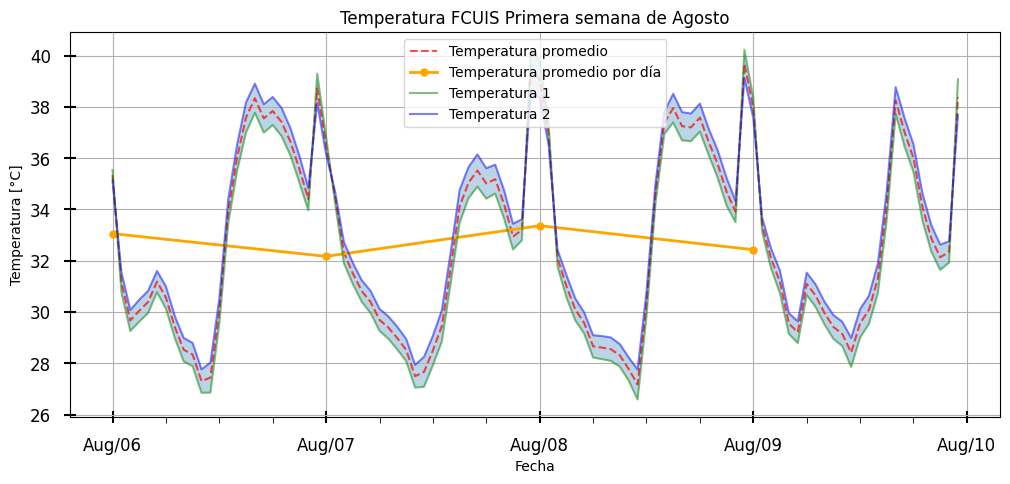

In [ ]:
import matplotlib.dates as mdates

#Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

#Graficamos los datos
plt.plot(temp_mean, '--r', label="Temperatura promedio", alpha=0.7)
plt.plot(temp_mean_d, '-o', label="Temperatura promedio por día", ms=5, lw=2, color="orange")
plt.plot(temp['T1'], "-g", label="Temperatura 1", alpha=0.5)
plt.plot(temp['T2'], "-b", label="Temperatura 2", alpha=0.5)
plt.fill_between(temp_mean.index, y1 = temp.T1, y2 = temp.T2, alpha=0.3)

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b/%d'))
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))

#Agregamos la leyenda y los titulos
plt.xlabel('Fecha')
plt.ylabel("Temperatura [°C]")
plt.title("Temperatura FCUIS Primera semana de Agosto")
plt.grid(True)
plt.legend()

plt.show()

### **xaxis, Etiquetas y malla**

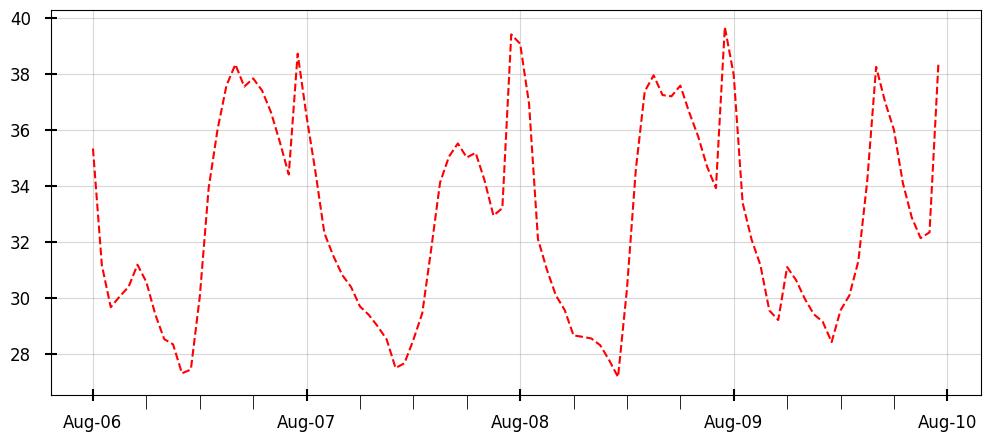

In [ ]:
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

plt.plot(temp_mean, '--r')

#Malla
plt.grid(True, alpha=0.5, which='major')

#Dimensiones Ticks 
ax.tick_params(which='major',         # Major ticks: subdividen los ejes en unidades mayores
                pad=10,               # Distancia entre etiquetas y ticks
                width=1.5,            # Ancho del tick
                length=8,             # Largo del tick 
                direction="inout",    # 'inout': ticks en la mitad de los ejes, 'in': ticks adentro de los ejes, 'out': ticks afuera de los ejes 
                labelsize=12)         # Tamaño de letra de la etiqueta

ax.tick_params(which='minor',         # Minor ticks: subdividen las unidades mayores
                length=10)            # Largo del tick 

# Formato y posiciones de ticks
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d'))     # Formato de fecha: %b: mes, %d: día, %Y: año
ax.xaxis.set_major_locator(mdates.DayLocator())                 # Posiciona ticks mayores en cada día
ax.xaxis.set_minor_locator(mdates.HourLocator([0,6,12,18]))     # Posiciona ticks menores en las horas 0.00 am, 6.00 am, 12.00 m, 6.00 pm

plt.show()


> `mdates.DateFormatter` solo funciona si el eje x dentro de `plot()` es un `DatetimeIndex` o si está en formato de fecha.

In [ ]:
type(temp.index[0])

pandas._libs.tslibs.timestamps.Timestamp

## **2. Promedio por agrupamiento**
**¿Exite un ciclo diurno en la temperatura?**

En los datos podemos buscar comportamientos que varien durante periodos de tiempo determinado. Por ejemplo, podemos promediar el valor de la temperatura en todas las horas del dia buscando patrones. Para esto usamos a función ```.groupby()``` de Pandas.
> Para más información sobre la función groupby, consultar la [documentación](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.groupby.html). 

In [65]:
temp['T_mean'] = temp_mean            #  Agregamos una columna con el promedio de los sensores al DataFrame temp
temp['hora'] = temp.index.hour.values # Agregamos una columna "hora" al DataFrame temp que contenga la hora de cada dato

In [67]:
temp[].groupby(temp['hour']).mean()

KeyError: 'hour'

### **La función `.gropuby()`**

Empleamos la función ```.groupby()``` para agrupar los datos por hora del día y obtener un único valor de temperatura por hora mediante la media aritmética de los datos. Esto nos permitirá visualizar los datos de temperatura de forma más clara con un dato para cada hora del día, el cual será más o menos representativo dependiendo del fenómeno que queramos analizar. Además de obtener el promedio de la temperatura para cada hora, también podemos obtener los valor máximos y mínimos registrados durante el periodo de tiempo analizado, esto con las funciones ```.max()``` y ```.min()``` de Pandas, respectivamente. 

In [ ]:
# Agrupamos los valores de la temperatura por hora y promediamos para el promedio
horario = temp['T_mean'].groupby(temp['hora']).mean()
horario_1 = temp['T1'].groupby(temp['hora']).mean()
horario_2 = temp['T2'].groupby(temp['hora']).mean()

#También podemos obtener los valores máximos y minimos de temperatura durante la semana para cada hora del promedio
horario_max = temp['T_mean'].groupby(temp['hora']).max()
horario_min = temp['T_mean'].groupby(temp['hora']).min()

### **Generación de gráficas**

Una vez obtenidos los valores promedio de temperatura por hora, graficamos el promedio, el máximo y el mínimo de cada hora de la misma forma que en el proceso anterior.

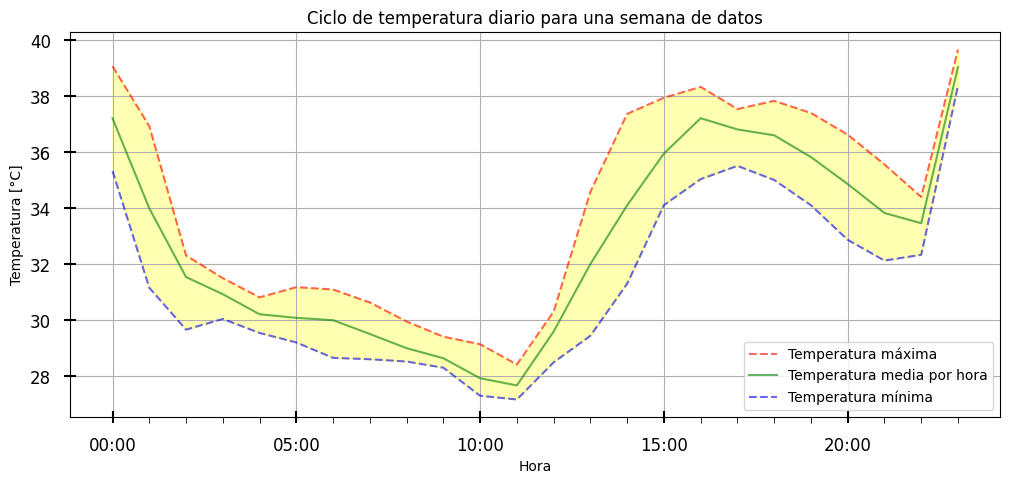

In [ ]:
#Generamos la figura
fig = plt.figure(figsize=(12, 5))
ax = fig.gca()

#Graficamos los datos
plt.plot(horario_max, '--r',label="Temperatura máxima", alpha=0.6)
plt.plot(horario, '-g',label="Temperatura media por hora", alpha=0.6)
plt.plot(horario_min,'--b', label="Temperatura mínima", alpha=0.6)

#Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(horario_max.index, horario_max, horario_min, alpha=0.3, color="yellow")

#Formateamos el eje de fechas para que se vea mejor
ax.tick_params(which='major', pad=10, length=8, labelsize=12, direction="inout", width=1.5)
ax.tick_params(which='minor', length=4)
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"])

#Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]")
plt.xlabel("Hora")
plt.title("Ciclo de temperatura diario para una semana de datos")
plt.grid(True)
plt.legend()

plt.show()


> ¿Este ciclo tiene sentido para ti?  

>¿Cómo piensas que se modificaria la grafica si ampliamos el periodo de los datos?

## **3. Cuartiles y Digrama de Caja y Bigotes**

### **Cuartiles**

A primera vista, podemos observar que el área sombreada entre los valores máximos y mínimos registrados por hora es amplia, lo que nos indica que la temperatura varía durante los días, dependiendo de la epoca del año. Por esto, vale la pena pensar:  

> ¿Qué tan representativo es el promedio de cada hora respecto al comportamiento real? 

En este caso, con representativo nos referimos a que tan cercano es el promedio de cada hora a la temperatura real registrada durante ese periodo de tiempo. Para responder esta pregunta podemos tener una visión más clara si calculamos los cuartiles del conjunto de datos.

<div class="alert alert-block alert-info">
<b>¿Qué son los cuartiles?</b> Los cuartiles son valores que dividen un conjunto de datos ordenados en cuatro partes iguales. El <b>primer cuartil (Q1)</b> es el valor medio entre el valor más bajo y la mediana de los datos, esto significa que el 25% de los datos son menores que el primer cuartil. El <b>segundo cuartil (Q2)</b> es la mediana de los datos, esto significa que el 50% de los datos son menores que el segundo cuartil. El <b>tercer cuartil (Q3)</b> es el valor medio entre la mediana y el valor más alto de los datos, esto significa que el 75% de los datos son menores que el tercer cuartil. Además, el <b>rango intercuartil (IQR)</b> indica la diferencia entre el primer y el tercer cuartil, dando una idea de la disperción de los datos. Los cuartiles se emplean para saber que tan representativo es el promedio puesto que nos indican que tan dispersos están los datos. Si los cuartiles están muy separados, significa que los datos están muy dispersos y el promedio no es representativo. Si los cuartiles están muy cercanos, significa que los datos están muy concentrados y el promedio es representativo.
</div>  

Con esto en mente, definiremos las funciones que nos permitirán calcular los cuartiles de los datos. Para esto, utilizaremos las funciones ```.quantile()``` y ```.median()``` de numpy. Luego, estas funciones serán aplicadas a los datos agrupados por hora para obtener los cuartiles de cada hora, esto mediante la función ```.agg()``` de Pandas.

In [ ]:
# Definimos las funciones para cada cuartil
def q1(x):
    return x.quantile(0.25)

def q2(x):
    return x.median()

def q3(x):
    return x.quantile(0.75)

# Agrupamos los valores de la temperatura por hora y calculamos los cuartiles y el promedio
cuartiles = temp['T_mean'].groupby(temp['hora']).agg([q1, q2, q3, np.mean])

Una vez obtenidos los cuartiles de los datos, los graficaremos junto al promedio, los máximos y los mínimos de los datos.

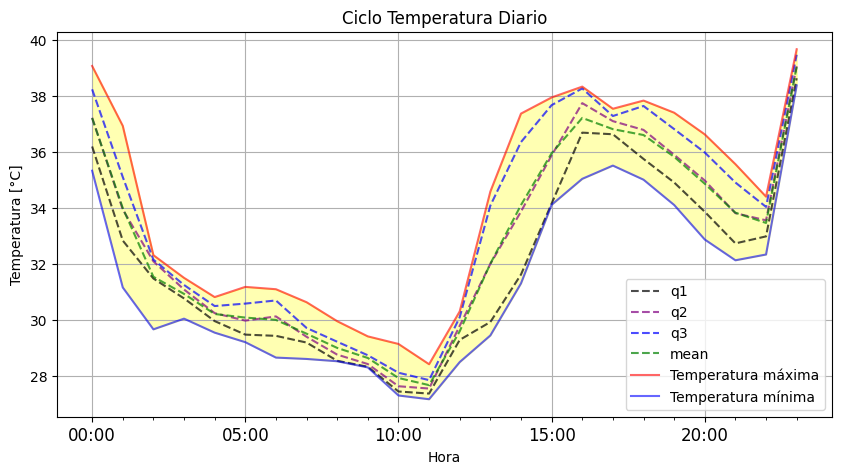

In [ ]:
#Generamos la figura
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

# Graficamos los datos a partir del DataFrame con la función plot de pandas
cuartiles.plot(ax=ax, alpha=0.7, style=["--","--","--","--"], color=["black","purple","blue","green"])

# Graficamos los valores máximos y mínimos
plt.plot(horario_max,'-r', label="Temperatura máxima", alpha=0.6)
plt.plot(horario_min,'-b', label="Temperatura mínima", alpha=0.6)

# Coloreamos el area entre las lineas de maximo y minimo
plt.fill_between(horario_max.index, horario_max, horario_min, alpha=0.3, color="yellow")

# Formateamos el eje de fechas para que se vea mejor
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"], fontsize=12)

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]")
plt.xlabel("Hora")
plt.title("Ciclo Temperatura Diario")
plt.grid(True)
plt.legend()

plt.show()


> ¿Qué puedes decir de los cuartiles de los datos respecto al promedio?  

> ¿Qué puedes decir de los cuartiles de los datos respecto a los valores máximos y mínimos? 

> ¿Qué dice esto de la representatividad del promedio de cada hora?

### **Diagrama de cajas y bigotes**

Puede que la visualización de los cuartiles, el promedio y los valores extremos de la forma anterior no sea la más adecuada para analizar los datos. Por esto, podemos graficar los cuartiles, el promedio y los valores extremos de una forma más clara utilizando un **gráfico de cajas y bigotes**. Para esto, emplearemos la librería [Seaborn](https://seaborn.pydata.org/), la cual es una librería de visualización estadística de datos basada en Matplotlib.  

En la figura podemos obserbar un ejemplo de un gráfico de cajas y bigotes. En este gráfico, la caja representa el rango intercuartil (IQR), la línea horizontal dentro de la caja representa la mediana (Q2), los bigotes representan los valores máximos y mínimos, y los puntos representan los valores atípicos. Estos valores máximos y mínimos se calculan como 1.5 veces el rango intercuartil (IQR) por encima del tercer cuartil (Q3) y por debajo del primer cuartil (Q1), respectivamente, lo cual es diferente a los valores máximos y mínimos calculados anteriormente, por tanto, los valores atípicos son aquellos por fuera de estos límites. El uso de este gráfico nos permite visualizar de forma más clara el conjunto de los datos y los valores atípicos.

<img width="600px"  src="https://gitmilab.redclara.net/halleyUIS/moncora/-/raw/main/Book/images/grafica_cajas_bigotes.png" align="center">  

Con esto en mente, importamos la librería Seaborn y, con ayuda de la función ```.boxplot()``` de Seaborn, realizaremos un gráfico de cajas y bigotes para los datos agrupados por hora. Además, graficaremos los valores máximos, mínimos y el promedio de los datos, para ver su relación con la gráfica de cajas y bigotes.

### **El atributo fontsize**

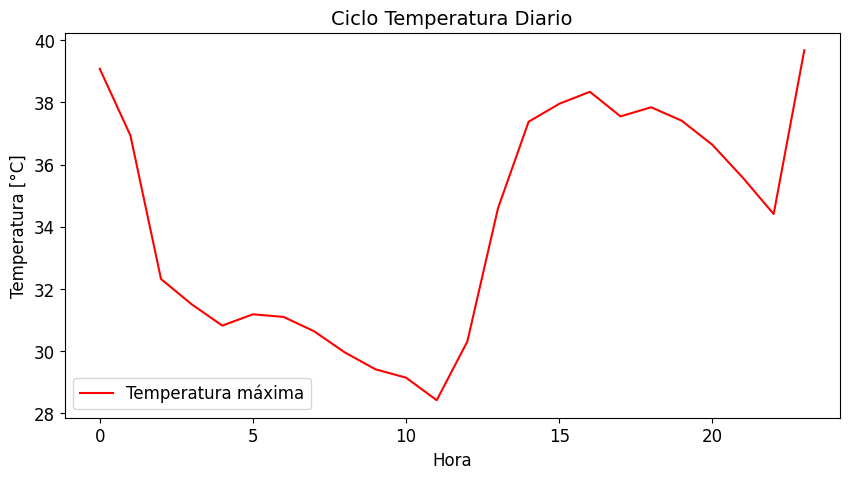

In [ ]:
#Generamos la figura
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
plt.plot(horario_max,'-r',label="Temperatura máxima")

plt.ylabel("Temperatura [°C]", fontsize=12)
plt.xlabel("Hora", fontsize=12)
plt.title("Ciclo Temperatura Diario", fontsize=14)

plt.legend(fontsize=12)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

plt.show()

### **Generación de gráficas**

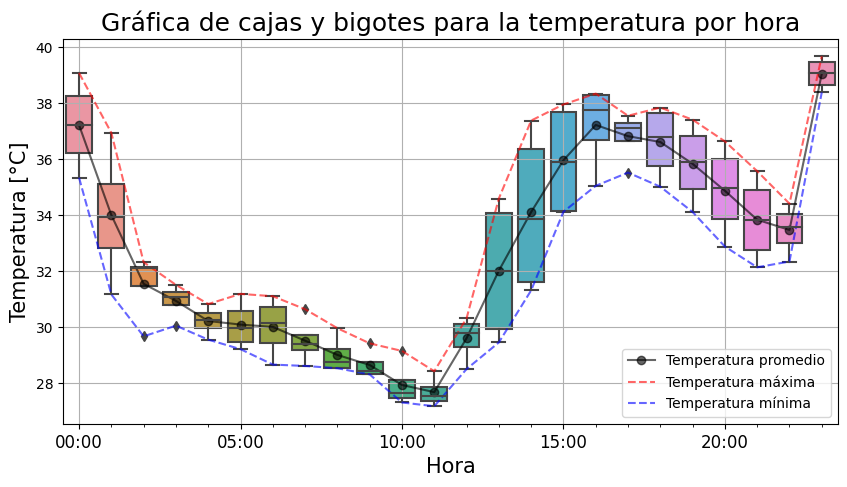

In [ ]:
import seaborn as sns

#Generamos la figura
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()

# Graficamos los datos a partir del DataFrame con la función boxplot de seaborn
sns.boxplot(data = temp, x='hora', y='T_mean', ax=ax)

# Graficamos el promedio
plt.plot(horario, "-ok", label="Temperatura promedio", alpha=0.6)

# Graficamos los valores máximos y mínimos
plt.plot(horario_max, '--r', label="Temperatura máxima", alpha=0.6)
plt.plot(horario_min, '--b', label="Temperatura mínima", alpha=0.6)

# Formateamos el eje de fechas para que se vea mejor
ax.set_xticks(range(0,24,5))
ax.set_xticks(range(0,24,1), minor=True)
ax.set_xticklabels(["00:00", "05:00", "10:00", "15:00", "20:00"], fontsize=12)

# Agregamos la leyenda, los titulos y la grilla
plt.ylabel("Temperatura [°C]", fontsize=15)
plt.xlabel("Hora", fontsize=15)
plt.title("Gráfica de cajas y bigotes para la temperatura por hora", fontsize=18)
plt.legend()
plt.grid(True)

plt.show()

> ¿Qué puedes decir de los valores atípicos?  

> ¿Cómo se relacionan los valores atípicos con los valores máximos y mínimos?  

> ¿Puedes decir que tan representativo es el promedio de cada hora respecto a los datos reales?